In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [3]:
# Build the Sequential feedforward neural network model
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(16,activation='relu'),
    Dense(16, activation='sigmoid'),
    Dense(10,activation='softmax')
    
])
model2 = Sequential([
    Flatten(input_shape=(28,28),name='Flatten'),
    Dense(16,activation='relu',name='desnse_hidden2'),
    Dense(16, activation='sigmoid',name = 'desnse_hidden1'),
    Dense(10,activation='softmax')
    
])


In [4]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [5]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
desnse_hidden2 (Dense)       (None, 16)                12560     
_________________________________________________________________
desnse_hidden1 (Dense)       (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [7]:
# Build the Sequential convolutional neural network model

model = Sequential([
    Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax')
])

In [8]:
# Print the model summary

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2704)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                173120    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 173,930
Trainable params: 173,930
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [10]:
# Define the model optimizer, loss function and metrics

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
# Print the resulting model attributes
print(f"{model.metrics}\n{model.optimizer}\n{model.loss}\n{model.optimizer.lr}")

sparse_categorical_crossentropy
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>


***
<a id="coding_tutorial_4"></a>
## The fit method

In [12]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [13]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [14]:
# Print the shape of the training data

train_images.shape

(60000, 28, 28)

In [15]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [16]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images/255
test_images = test_images/255

Ankle boot


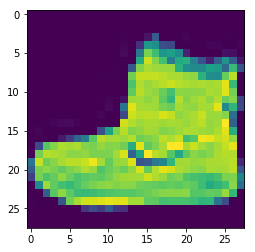

In [19]:
# Display one of the images

plt.imshow(train_images[0])
print(labels[train_labels[0]])

#### Fit the model

In [20]:
# Fit the model
history = model.fit(train_images[...,np.newaxis],train_labels,epochs=5)


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 82s 1ms/sample - loss: 0.4250 - accuracy: 0.8497
Epoch 2/5
60000/60000 [==============================] - 77s 1ms/sample - loss: 0.2922 - accuracy: 0.8952
Epoch 3/5
60000/60000 [==============================] - 77s 1ms/sample - loss: 0.2545 - accuracy: 0.9077
Epoch 4/5
60000/60000 [==============================] - 77s 1ms/sample - loss: 0.2255 - accuracy: 0.9180
Epoch 5/5
60000/60000 [==============================] - 77s 1ms/sample - loss: 0.2039 - accuracy: 0.9239


#### Plot training history

In [23]:
# Load the history into a pandas Dataframe
df = pd.DataFrame(history.history)
df.head()


,loss,accuracy
0,0.425047,0.849717
1,0.292226,0.895150
2,0.254543,0.907700
3,0.225458,0.918017
4,0.203921,0.923917


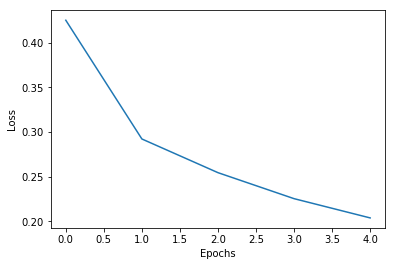

In [24]:
# Make a plot for the loss
plt.plot(df['loss']) #accessing the loss col from dataframe and plotting
plt.xlabel('Epochs') #labeling the x-axis
plt.ylabel('Loss') #labeling the y-axis
plt.show() #showing plot


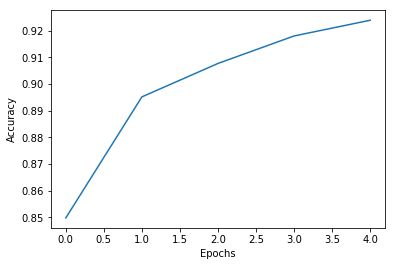

In [25]:
# Make a plot for the accuracy
plt.plot(df['accuracy']) #accessing the loss col from dataframe and plotting
plt.xlabel('Epochs') #labeling the x-axis
plt.ylabel('Accuracy') #labeling the y-axis
plt.show() #showing plot


***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [26]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [27]:
# Evaluate the model

loss,acc = model.evaluate(test_images[...,np.newaxis],test_labels,verbose=2)

10000/1 - 5s - loss: 0.3220 - accuracy: 0.9037


#### Make predictions from the model

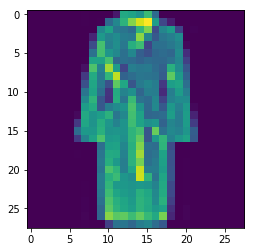

Label: Coat


In [28]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [29]:
# Get the model predictions
pred = model.predict(test_image[np.newaxis,...,np.newaxis])
print(f"Label is {labels[np.argmax(pred)]}")

Label is Coat
